# 因子投资中的机器学习—— Chapter 5 树模型

**作者**: 林劲展  
**日期**: 2024-10-05  
**电子邮件**: jinzl@stu.pku.edu.cn  
**电话号码**: +86 13026888733  
**单位**: 北京大学汇丰商学院  
**专业方向**: 数量金融

---

## 项目简介
<p><span style="font-size: 18px;">
这一部分主要是介绍分类树和回归树。在处理表格数据时，树模型及其衍生方法相当有效。在一些机器学习竞赛中，很多获胜的解决方案都源于对简单树模型的改进。近来，树模型被更多应用于投资组合配置。

### 一、简单决策树
<p><span style="font-size: 18px;">
1、原理

<p><span style="font-size: 18px;">决策树寻求将数据集划分为同质化的簇。给定一个外生变量Y和特征X，决策树迭代地将样本划分为若干簇，通常一次分为两簇。每次划分根据特征集中的一个变量进行。当Y由实数组成时，是回归树；Y由分类变量构成，是分类树。

<p><span style="font-size: 18px;">以下是一个例子:12颗星星有三个特征，分别是颜色、大小和角数。因变量是颜色。第一次划分根据的是角数，角数多的星星多是蓝色和绿色的，而角数少的多是黄色、橙色和红色的。第二次划分根据的是大小。

<p><span style="font-size: 18px;">类比于因子投资：就是通过公司具体属性如市值、会计比率来找到收益率较高（暖色调）的公司。

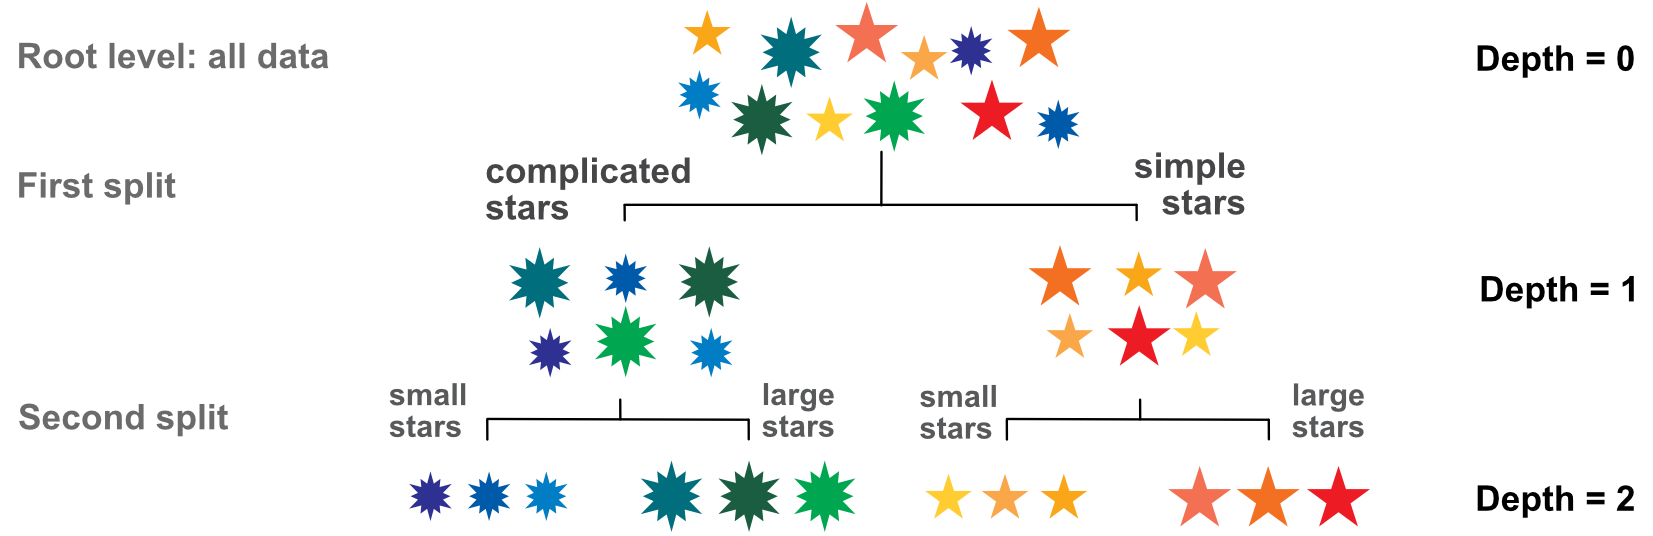

<p><span style="font-size: 18px;">回归树构造的目标是找到一个最佳的划分点，使得分割后的两簇数据在目标变量上的同质化水平最高。这通常通过最小化划分后的误差来实现。在回归树中，同质化水平指的是每个分割后的子集内部目标变量的相似度。具体来说，常用的方法是选择一个划分点，使得子集内部目标变量的方差最小化：

$$V_i^{(k)}(c^{(k)})= \sum_{x_i^{(k)}<c^{(k)}}(y_i-m_I^{k,-}(c^{(k)}))^2+\sum_{x_i^{(k)}>c^{(k)}}(y_i-m_I^{k,+}(c^{(k)}))^2$$

<p><span style="font-size: 18px;">$m_I^{k,-}(c^{(k)})$和$m_I^{k,+}(c^{(k)})$是x大于或小于c情况下，Y的均值。最佳划分点满足$c^{k,*}=argmin_{c^{(k)}}V_I^{(k)}(c^{(k)})$

<p><span style="font-size: 18px;">在所有可能的划分变量中，树将选择一个不仅在所有划分中，而且在所有变量中总离散度最小的变量$k^*=argmin_kV_I^{(k)}(c^{k,*})$

<p><span style="font-size: 18px;">在进行一次划分后，上述过程继续在两个新形成的簇中进行。有几个标准可以决定何时停止划分，一个是设定最大层数，即深度；另一个则是对每次划分施加预期最小增益，若每次划分后离散度的降低低于阈值，划分不会被执行。

<p><span style="font-size: 18px;">树建立后，对新观测值的预测非常容易。给定其特征值，观测值会出现在树的一个叶节点，即终结点。每个叶节点都有一个标签的平均值，即为预测的结果。

<p><span style="font-size: 18px;">2、分类任务的细节

<p><span style="font-size: 18px;">分类任务比回归任务要复杂一些，区别在于对离散度或异质性的衡量。损失函数必须考虑到最终的输出不是一个简单的数字，而是一个向量。输出$\tilde{y_i}$有多少个元素，标签中就有多少个类别，每个元素代表观测值属于相应类别的概率。损失函数必须考虑到标签的多维度。在建立树的时候，由于目的是追求同质性，损失会惩罚哪些不集中于一个类别的输出。即算法追求纯洁性，通常的损失函数如下：

$$基尼不纯度系数：1-\sum_{j=1}^Jp_j^2$$

$$错误分类误差：1-\max_{j}p_j$$

$$熵：-\sum_{j=1}^Jlog(p_j)p_j$$

<p><span style="font-size: 18px;">其中$p_j$表示划分产生的比例。基尼不纯度系数等于1减去衡量投资组合多样化的赫芬达尔指数。树模型会寻求分散程度最低的分区。当某个$p_j$=1时，基尼系数达到最小值0；当$p_j$=1/J时，基尼系数达到最大值1-1/J。其他两种损失函数也类似。错误分类误差的缺点在于不可导。

<p><span style="font-size: 18px;">为了预测，新观测点被划分到某个叶节点时，该叶节点占比最高的类别会作为分类预测。

<p><span style="font-size: 18px;">
3、剪枝标准

<p><span style="font-size: 18px;">在构建一棵树时，划分过程可以一直持续到全树长成，即所有观测值都属于不同叶节点，所有叶节点都包括不能根据当前特征集进一步分离的观测值。当然对于样本内，这样的拟合非常完美；但对于样本外的预测，这样的细枝末节并不起作用。树模型最可靠的部分在于最接近根部的部分，因为其包含大量数据中的最普遍的模式。因而，限制树的大小以避免过拟合非常有必要：

（1）每个叶节点观测值添加最低数量约束。

（2）进一步划分前，规定簇的最小规模。

（3）要求拟合有一定程度的改进，损失函数一定程度减小。

（4）限制树的深度。

<p><span style="font-size: 18px;">
4、示例

In [1]:
import pandas as pd # 加载数据
import numpy as np
data_ml=pd.read_csv('data_ml.csv' ) # 导入数据

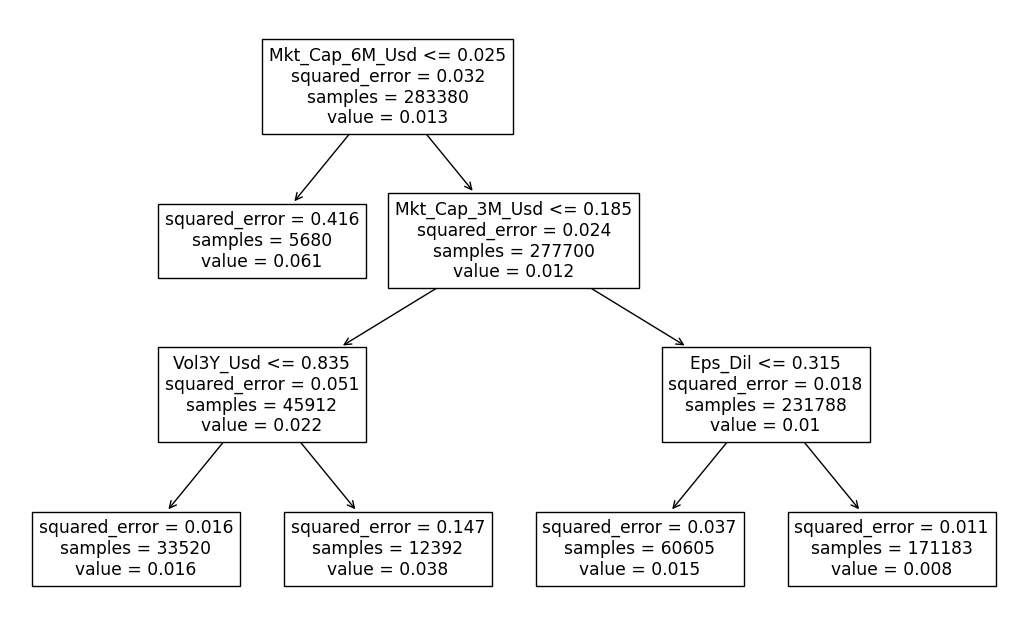

In [2]:
from sklearn import tree # Tree module
import matplotlib.pyplot as plt # to adjust tree plot

X = data_ml.iloc[:,2:95] # recall features/predictors, full sample
y = data_ml['R1M_Usd'] # recall label/Dependent variable, full sample

fit_tree = tree.DecisionTreeRegressor( # Definining the model
  min_samples_split = 8000, # Min nb of obs required to continue splitting 
  max_depth = 3, # Maximum depth (i.e. tree levels)
  ccp_alpha=0.000001, # complexity parameters
  min_samples_leaf =3500 # Min nb of obs required in each terminal node (leaf)
        )
fit_tree.fit(X, y) # Fitting the model
fig, ax = plt.subplots(figsize=(13, 8)) # resizing
tree.plot_tree(fit_tree,feature_names=X.columns.values, ax=ax) # Plot the tree
plt.show()

<p><span style="font-size: 18px;">每个节点中若不等式为真，则进入左边簇；反之进入右边簇。samples显示样本数，value显示平均收益率。最右侧收益最低的簇满足：PB得分大于0.025，三个月市值得分大于0.185，稀释后每股收益得分大于0.315。应该注意树的划分能力，几个大簇聚集所有观测值往往不是好结果，在样本外将不会有泛化能力。

In [3]:
y_pred=fit_tree.predict(X.iloc[0:6,:])   # Test (prediction) on the first six instances of the sample
print(f'y_pred: {y_pred}')

y_pred: [0.01453468 0.01453468 0.01453468 0.03834095 0.03834095 0.03834095]


<p><span style="font-size: 18px;">显然，前三个预测值来源于第四个簇；后三个观测值来源于第四个簇。预测值均来源于簇的平均值。

<p><span style="font-size: 18px;">作为划分的验证，以下作图画出收益率与上述划分变量的曲线。

C:\Users\36119\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\36119\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


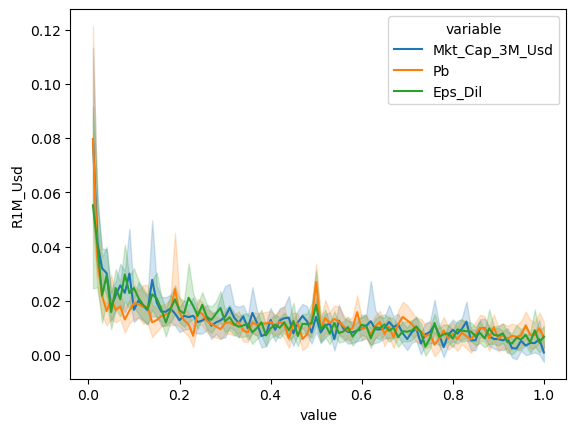

In [4]:
import seaborn as sns
unpivoted_data_ml = pd.melt(data_ml[['R1M_Usd','Mkt_Cap_3M_Usd','Pb','Eps_Dil']], id_vars='R1M_Usd') # selecting and putting in vector
sns.lineplot(data = unpivoted_data_ml, y='R1M_Usd', x='value', hue='variable'); # Plot from seaborn

In [5]:
from sklearn.model_selection import train_test_split
features=X.columns
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#y_train = training_sample['R1M_Usd'].values # recall features/predictors, full sample
#X_train = training_sample[features].values # recall label/Dependent variable, full sample

fit_tree2 = tree.DecisionTreeRegressor( # Definining the model
  min_samples_split = 4000, # Min nb of obs required to continue splitting
  max_depth = 5, # Maximum depth (i.e. tree levels)
  ccp_alpha=0.0001, # complexity parameters
  min_samples_leaf =1500 # Min nb of obs required in each terminal node (leaf)
        )
fit_tree2 = fit_tree2.fit(X_train, y_train) # Fitting the model

mse = np.mean((fit_tree2.predict(X_test) - y_test)**2)
print(f'MSE: {mse}')

hitratio = np.mean(fit_tree2.predict(X_test) * y_test > 0)
print(f'Hit Ratio: {hitratio}')

<p><span style="font-size: 18px;">我们又构建了一棵树，MSE通常很难解释，难以用于投资决策。命中率是一个更直观的指标，评估了正确预测的比例，显然并不完美，55%的小额收益也可能被45%的大额亏损抵消。但仍然不失为一个成功指标，考虑到交易成本，基准阈值须在52%。

### 二、随机森林
<p><span style="font-size: 18px;">
1、原理

<p><span style="font-size: 18px;">大多数时候，当手头上又多个可供选择的模型，哪一个单独的模型是最好的并不是明显的。因此将多个模型组合在一起似乎是实现预测误差分散化的合理途径。有两种方法可以从简单的树中创建多个预测变量，而随机森林将两者结合起来。

<p><span style="font-size: 18px;">第一，随机森林可以在类似但不同的数据集上进行训练。即自举法，对观测值进行重新抽样，无论有无替换，每次建立新的树都会产生新的训练数据。

<p><span style="font-size: 18px;">第二，可以通过减少预测变量的数量来改变数据。替代模型时基于不同的特征集而建立的。用户选择保留多少特征，算法在每次尝试时随机选择这些特征。

<p><span style="font-size: 18px;">因而训练许多不同的树变得很简单，而集成模型只是所有树的一个加权组合，通常稳健的选择是等权重。

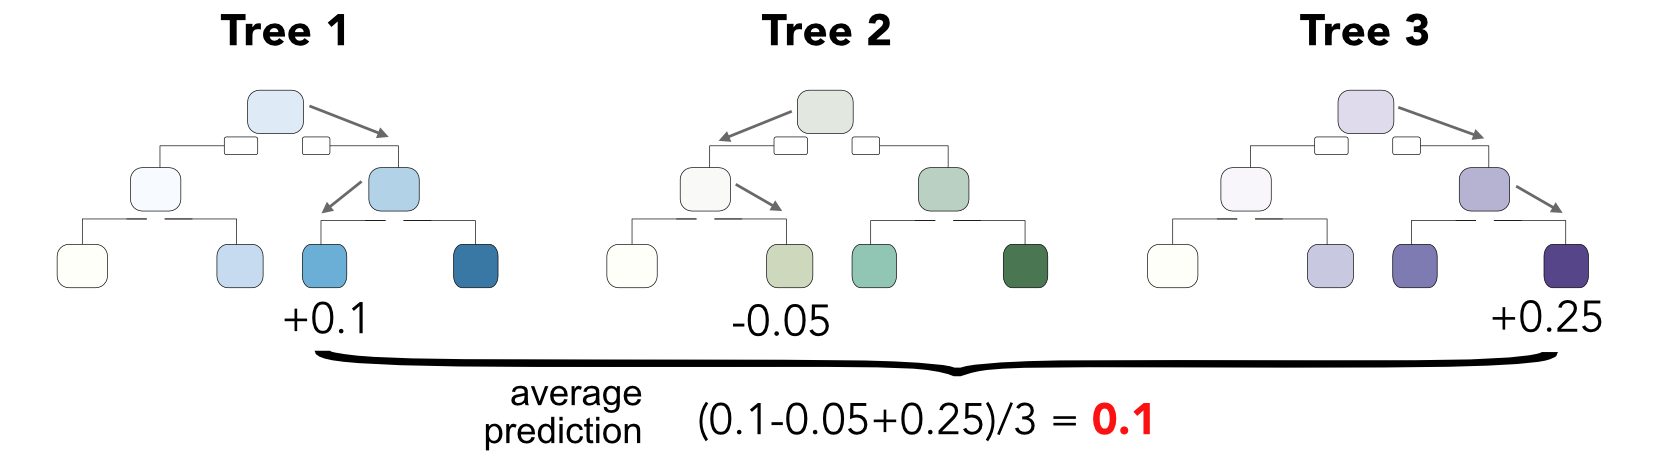

<p><span style="font-size: 18px;">在分类任务中，决策是通过投票得出的：每棵树都为某个特定的类别投票，得票最多的类别获胜。误示训练样本前五个观测值的预测结果

<p><span style="font-size: 18px;">
对于一个样本$x_i$，其真实类别为$y_i$，分类树（或集成模型）给出的预测结果是$\hat{y}_i$。余量函数描述了模型对样本的分类信心。
    
<p><span style="font-size: 18px;">
在集成模型（如随机森林）中，余量函数定义为：

${margin}(x_i) = \frac{1}{T} \sum_{t=1}^{T} I(\hat{y}_i^t = y_i) - \max_{j \neq y_i} \frac{1}{T} \sum_{t=1}^{T} I(\hat{y}_i^t = j)$

<p><span style="font-size: 18px;">
T是树的数量，I是指示函数，预测正确时为1，否则为0第一个部分表示模型对正确类别的信心，第二个部分表示模型对错误类别中最大可能类别的信心。若余量较大，说明模型对样本正确分类很有信心。


<p><span style="font-size: 18px;">2、代码与结果

<p><span style="font-size: 18px;">以下训练一个模型并展示训练样本前五个观测值的预测结果

In [ ]:
from sklearn.ensemble import RandomForestRegressor

fit_RF = RandomForestRegressor(n_estimators = 40, # Nb of random trees
criterion ='friedman_mse', # function to measure the quality of a split
min_samples_split= 250, # Minimum size of terminal cluster
bootstrap=True, # replacement 放回抽样
max_features=30, # Nb of predictive variables for each tree
max_samples=10000 # Size of (random) sample for each tree
)
fit_RF.fit(X_train, y_train) # Fitting the model
fit_RF.predict(pd.DataFrame(X_test).iloc[0:5,]) # Prediction over the first 5 test instances 

<p><span style="font-size: 18px;">可见这五个预测结果各不相同。将多个树模型的预测结果组合在一起，可以得到受样本影响更大的预测结果。与简单的树模型不同，我们很难简单、直观呈现如此多的树各自学习过程的结果。但分析特征重要性可以得到一个简化的说明。最后评估模型的命中率。

In [ ]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test, fit_RF.predict(X_test))
print(f'MSE: {mse}')

hitratio = np.mean(fit_RF.predict(X_test) * y_test > 0)
print(f'Hit Ratio: {hitratio}')


<p><span style="font-size: 18px;">可见MSE小于3%，命中率接近54%。接着我们尝试通过分类任务来提高命中率，把标签改为R1M_Usd_C

In [ ]:
y_transformed = y.apply(lambda x: 1 if x > 0 else (0 if x < 0 else 0))#将未来正收益设为1，其余为0
X_train, X_test, y_c_train, y_c_test = train_test_split(X, y_transformed, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

fit_RF_C = RandomForestClassifier( 
n_estimators = 40, # Nb of random trees
criterion ='gini', # function to measure the quality of a split
min_samples_split= 250, # Minimum size of terminal cluster
bootstrap=True, # replacement
max_features=30, # Nb of predictive variables for each tree
max_samples=20000 # Size of (random) sample for each tree
)
fit_RF_C=fit_RF_C.fit(X_train, y_c_train) # Fitting the model

hitratio = np.mean(fit_RF_C.predict(X_test) == y_c_test)
print(f'Hit Ratio: {hitratio}')

<p><span style="font-size: 18px;">这里我们取得了一点命中率提升。一般来说，在分类任务和回归任务中，默认选择的预测变量数量分别为$\sqrt{p}$和$\frac{p}{3}$，其中p是特征数量。而特征数量保留过多同时也会留下相关性弱的变量。以下取特征数量平方根的最大特征数似乎得到一点提升。

In [ ]:
from sklearn.ensemble import RandomForestClassifier

fit_RF_C = RandomForestClassifier( 
n_estimators = 40, # Nb of random trees
criterion ='gini', # function to measure the quality of a split
min_samples_split= 250, # Minimum size of terminal cluster
bootstrap=True, # replacement
max_features=9, # Nb of predictive variables for each tree 取特征数量的平方根
max_samples=20000 # Size of (random) sample for each tree
)
fit_RF_C=fit_RF_C.fit(X_train, y_c_train) # Fitting the model

hitratio = np.mean(fit_RF_C.predict(X_test) == y_c_test)
print(f'Hit Ratio: {hitratio}')

### 三、提升树
<p><span style="font-size: 18px;">
与不可知的集成相比，提升的想法稍微高级一些。通过树的多样化提高模型的整体表现。而在提升方法中，添加新树时，我们会迭代地改进模型。

<p><span style="font-size: 18px;">1、方法论

<p><span style="font-size: 18px;">提升树通过逐步关注产生最大误差的观测值来改善学习过程。算法一般结构是首先设置等权重的样本，对所有树循环执行以下步骤：

1、寻找树使得加权损失函数$\sum_{i=1}^I\omega_iL(l_m(x_i),y_i)$最小化，损失函数L取决于不同任务。

2、计算树的权重$a_m=f_a(\omega,l_m(x),y)$，产生较小错误的树应该有较大的权重。

3、更新观测值权重为$\omega_ie^{f_{\omega}(l_m(x_i),y_i)}$，对当前模型做得不好的观测值给予更大权重以改进。

4、对权重进行标准化，使得样本权重和为1

<p><span style="font-size: 18px;">观察值的输出即为$\tilde{y_i}=f_y(\sum_{m=1}^Ma_ml_m(x_i))$
    
<p><span style="font-size: 18px;">对于分类任务个体误差$\epsilon_i=1_{y_i≠l_m(x_i)}$对于回归任务个体误差则是$\epsilon_i=\frac{|y_i-l_m(x_i)|}{\max_i|y_i-l_m(x_i)|}$

<p><span style="font-size: 18px;">加权误差则为$\epsilon=I^{-1}\sum_{i=1}^I\omega_i\epsilon_i$

<p><span style="font-size: 18px;">通过$f_a=log(\frac{1-\epsilon}{\epsilon})$给树赋权

<p><span style="font-size: 18px;">通过$f_w(i)=f_a\epsilon_i$给观测值赋权。观测值加权可以通过损失函数加权或随机抽样执行。

<p><span style="font-size: 18px;">$f_y$输出，若为分类任务则是sign(x)，若为回归任务则是预测的加权中位数。

<p><span style="font-size: 18px;">2、示例

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

fit_adaboost_C = AdaBoostClassifier(DecisionTreeClassifier(
        max_depth=3), # depth of the tree
        n_estimators=3) # Number of trees 
fit_adaboost_C.fit(X_train, y_c_train) # Fitting the model

from sklearn.metrics import accuracy_score # introducing buit-in function for accuracy
hitratio=accuracy_score(y_c_test, fit_adaboost_C.predict(X_test)) # Hitratio
print(f'Hit Ratio: {hitratio}')

### 四、极端梯度提升算法
<p><span style="font-size: 18px;">
极端梯度提升算法试图最小化的目标是：

$$O=\sum_{i=1}^Iloss(y_i,\tilde{y_i})+\sum_{j=1}^J\Omega(T_j)$$

<p><span style="font-size: 18px;">
第一项衡量真实标签与模型输出之间的距离，第二项惩罚过于复杂的模型。以最简单的损失函数$loss(y,\tilde{y})=(y-\tilde{y})^2$为例：

$$O=\sum_{i=1}^I(y_i-m_{J-1}(x_i)-T_J(x_i))^2+\sum_{j=1}^J\Omega(T_j)$$

<p><span style="font-size: 18px;">
此函数即为训练第J棵树时的损失函数。其中$m_{J-1}$代表前J-1个模型的预测平均值，而$T_J$表示第J个模型的加权预测值。
 
<p><span style="font-size: 18px;">
1、管理损失函数

<p><span style="font-size: 18px;">
损失函数整理为：

$$O=\sum_{i=1}^I(-2y_iT_J(x_i)+2m_{J-1}(x_i)T_J(x_i)+T_J(x_i)^2)+\Omega(T_J)+c$$

<p><span style="font-size: 18px;">所有已知项对优化过程没有影响，被归于常数c对于二次损失函数处理简单，对于复杂的损失函数，要使用泰勒展开法处理。

<p><span style="font-size: 18px;">
2、惩罚

<p><span style="font-size: 18px;">
给定一棵树T，使用$T(x)=w_{q(x)}$表示其结构。w表示输出值，q表示把输入映射带最终叶节点的函数。

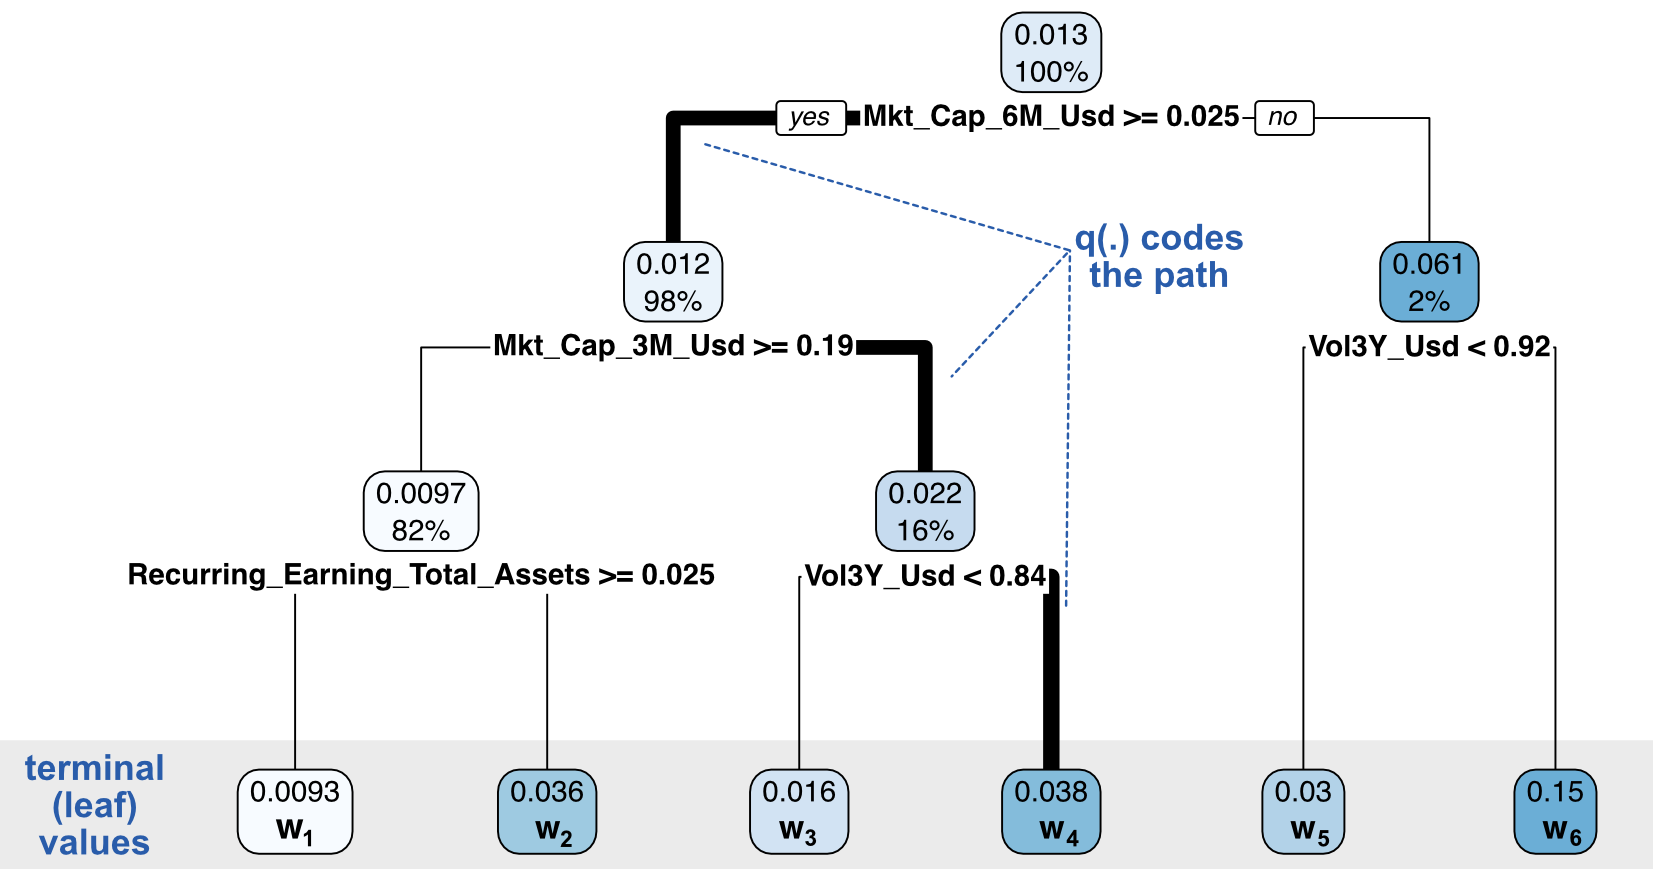

<p><span style="font-size: 18px;">用l=1,...,L表示叶节点的索引，在极端梯度提升算法中，复杂度被定义为：

$$\Omega(T)=\gamma L+\frac{\lambda}{2}\sum_{l=1}^L\omega_l^2$$

<p><span style="font-size: 18px;">第一项惩罚了叶节点的总数，减少了树的深度；第二项惩罚了输出值的大小，缩小了最新树的调整。

<p><span style="font-size: 18px;">3、合并

<p><span style="font-size: 18px;">将目标函数的两个部分合并在一起，整理得：

$$O=2\sum_{i=1}^I(\omega_l\sum_{i∈I_l}(-y_i+m_{J-1}(x_i))+\frac{\omega_l^2}{2}\sum_{i∈I_l}(1+\frac{\lambda}{2}))+\lambda L$$

<p><span style="font-size: 18px;">用$I_l$来表示属于叶节点l的观测值索引的集合。该函数是为二次函数

$$\omega_l^*=\frac{\sum_{i∈I_l}(-y_i+m_{J-1}(x_i))}{(1+\frac{\lambda}{2})Nb(i∈I_l)}$$

<p><span style="font-size: 18px;">于是目标函数：

$$O_L(q)=-\frac{1}{2}\sum_{l=1}{L}\frac{(\sum_{i∈I_l}(-y_i+m_{J-1}(x_i)))^2}{(1+\frac{\lambda}{2})Nb(i∈I_l)}+\lambda L$$

<p><span style="font-size: 18px;">4、树结构

<p><span style="font-size: 18px;">添加新树以减少损失时，节点的计算值会完全不同。迭代树要对特征进行测试以挑选出对给定划分来说目标函数最小的特征：

$$Gain=\frac{1}{2}(Gain_L+Gain_R-Gain_O)-\gamma$$

$$Gain_{\chi}=\frac{(\sum_{i∈I_\chi}(y_i-m_{J-1}(x_i))^2}{(1+\frac{\lambda}{2})Nb(i∈I_l)}$$

<p><span style="font-size: 18px;">$I_\chi$是簇$\chi$中观测值集合。$Gain_O$是原始增益，而$Gain_L$和$Gain_R$分别是左簇和右簇的增益。极端梯度提升树也使用了学习率，每棵树都被$\eta$缩放，以防止过拟合。

<p><span style="font-size: 18px;">5、扩展

<p><span style="font-size: 18px;">随机删除树（DART模型）和强加单调性约束可能是防止过拟合的方法。

<p><span style="font-size: 18px;">6、代码与结果

<p><span style="font-size: 18px;">以下可以任意减少特征变量数目，以及采用极端观测值以减少训练样本，减少训练时间。此处不对训练集做改变。

In [ ]:
import xgboost as xgb # The package for boosted trees
#separation_mask = data_ml['date'] > '2002-01-01'
#data_ml['R1M_Usd_quantile'] = data_ml.groupby('date')['R1M_Usd'].transform(         # creating quantile... 
#        lambda x: pd.qcut(x, 100, labels=False, duplicates=('drop'), precision=50)) # ...for selecting extreme values

#boolean_quantile=(data_ml.loc[separation_mask]['R1M_Usd_quantile'].        # boolean array for selecting rows
#                  values<=0.2) | (data_ml.loc[separation_mask]['R1M_Usd_quantile'].values>=0.8) # selecting extreme values
#training_sample=data_ml.loc[separation_mask]

###############################################################################
#train_features_xgb=training_sample.loc[boolean_quantile,features] # Independent variables
#train_label_xgb=training_sample.loc[boolean_quantile,'R1M_Usd'] # Dependent variable
#train_matrix_xgb=xgb.DMatrix(train_features_xgb, label=train_label_xgb) # XGB format!
train_matrix_xgb=xgb.DMatrix(X_train, label=y_train)

<p><span style="font-size: 18px;">以下可选使用单调性约束，以防止过拟合。

In [ ]:
#mono_const="(0, 0, -1, 1, 0, -1, 0)" # Initialize the vector -- "-1" == decreasing, "+1" increasing 强加单调性约束
# Decreasing in market cap -- mono_const[2]
# Increasing in past return -- mono_const[3]
# Decreasing in price-to-book -- mono_const[5]

In [ ]:
train_matrix_xgb=xgb.DMatrix(X_train, label=y_train)
params={'eta' : 0.3,                          # Learning rate
  'objective' : "reg:squarederror",     # Objective function
  'max_depth' : 4,                      # Maximum depth of trees
  'subsample' : 0.6,                    # Train on random 60% of sample
  'colsample_bytree' : 0.7,             # Train on random 70% of predictors
  'lambda' : 1,                         # Penalisation of leaf values
  'gamma' : 0.1,                        # Penalisation of number of leaves
  'nrounds' : 30,                       # Number of trees used (rather low here)
#  'monotone_constraints' : mono_const,  # Monotonicity constraints
  'rate_drop' : 0.1,                    # Drop rate for DART
  'verbose' : 0}                      # No comment from the algo 

fit_xgb =xgb.train(params, train_matrix_xgb)

In [ ]:
#separation_mask = data_ml['date'] <= '2002-01-01'
#testing_sample=data_ml.loc[separation_mask]
#y_test=testing_sample['R1M_Usd']
#test_features_xgb=testing_sample[features] # Test sample => XGB format
test_matrix_xgb=xgb.DMatrix(X_test, label=y_test) # XGB format!

fit_xgb.predict(test_matrix_xgb)
mse = np.mean((fit_xgb.predict(test_matrix_xgb) - y_test)**2)
print(f'MSE: {mse}')

In [ ]:
hitratio = np.mean(fit_xgb.predict(test_matrix_xgb) * y_test > 0)
print(f'Hit Ratio: {hitratio}')

<p><span style="font-size: 18px;">以下作为分类任务，标签必须为整数编码。处理损失时通常使用softmax函数。

In [ ]:
train_matrix_xgb_C=xgb.DMatrix(X_train, label=y_c_train) # XGB format!
params_C={'eta' : 0.8,                  # Learning rate
  'objective' : "multi:softmax",        # Objective function
  'max_depth' : 4,                      # Maximum depth of trees
  'num_class' : 2,                      # number of classes
  'nrounds' : 10,                       # Number of trees used (rather low here)
  'verbose' : 0}                        # No comment from the algo 

fit_xgb_C =xgb.train(params_C, train_matrix_xgb_C)
hitratio = np.mean(fit_xgb_C.predict(test_matrix_xgb) == y_c_test)
print(f'Hit Ratio: {hitratio}')

<p><span style="font-size: 18px;">命中率没有提升可能是因为切换到二进制标签可能会导致信息损失。

### 五、讨论

<p><span style="font-size: 18px;">观测值加权可以取决于观测值，对于极端的特征值增加权重。即赋权时早于组合优化。

<p><span style="font-size: 18px;">机器学习信号只是构建投资组合的一部分，这个信号必须转化为投资组合的权重。因而简单的树似乎不是最优选择，树的深度通常被设定为3~6这意味着8~64个叶节点，可能有很不平衡的簇，包含着两三成的样本。如果很多资产都有相同的信号，就难以选出新的组合纳入投资组合中。

<p><span style="font-size: 18px;">而集成模型的学习器足够多时，对资产的预测值将是唯一的。就有可能通过信号对资产加以区分。

### 六、代码练习

<p><span style="font-size: 18px;">1、将上述公式应用于训练样本，构建两个简单的决策树，使用一个参数 cp（复杂度参数）：对于第一个决策树，取 cp = 0.001；对于第二个决策树，取 cp = 0.01。在测试样本上评估这两个模型的表现，并进行评论。

<p><span style="font-size: 18px;">2、使用更小的一组预测变量，在训练样本上构建随机森林。将学习限制在 30,000 个实例和 5 个预测变量上。构建包含 10、20、40、80 和 160 棵树的随机森林，并评估其在训练样本上的表现。在这种情况下，复杂度是否值得？请解释原因。

<p><span style="font-size: 18px;">3、接着，绘制基于 2008 日历年数据的决策树，然后绘制基于 2009 年的数据的决策树，并进行比较。